<a href="https://www.kaggle.com/code/abhishek5454/gold-price-prediction?scriptVersionId=156996206" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Data Collection and Processing

In [2]:
#Loading the csv data to a pandas Dataframe
gold_data=pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')

In [3]:
#top 5 rows of the dataset

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#last five rows of data-set

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#number of rows and column
gold_data.shape

(2290, 6)

In [6]:
#getting information about dataset

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#getting the statistical measures about the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
#checking missing values

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**Correlation among the predictive variables**

In [9]:
correlation=gold_data.corr(numeric_only=True)

<Axes: >

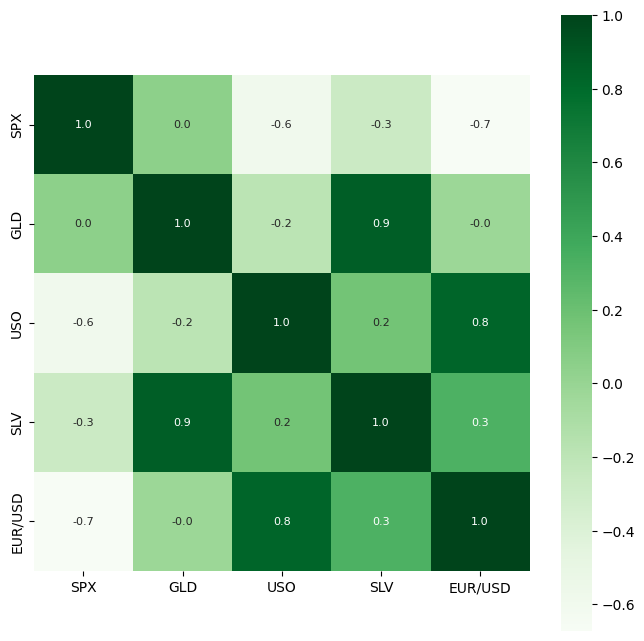

In [10]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [11]:
#correlation values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

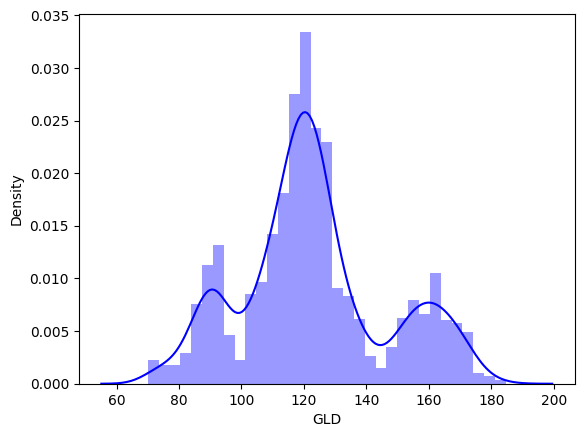

In [12]:
#checking the distribution of the Gold Price
sns.distplot(gold_data['GLD'],color='Blue')

# Splitting the Features and Target

In [13]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training data and Test data

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

# Model Training:Random Forest Regressor

In [17]:
regressor=RandomForestRegressor(n_estimators=100)

In [18]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evaluation

In [19]:
#prediction on Test Data
test_data_prediction=regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.60449964  81.91359992 115.86919995 127.52390064 120.51970144
 154.77309735 150.6777981  125.98310034 117.58859894 125.92040103
 116.67650094 172.23370025 141.50449804 167.85009853 115.3078
 117.68310044 138.86270233 170.13300074 159.57870251 161.72709966
 155.20550015 125.12460049 175.9424993  157.04270356 125.21180042
  94.00309984  77.14070034 120.66519989 119.17789976 167.45869951
  88.30800021 125.29930023  91.11430068 117.70890018 121.11819935
 136.20870016 115.70100133 115.06040115 148.67709974 107.30470126
 104.62440266  87.28829816 126.61650063 117.9779002  153.40069949
 119.72350007 108.39900015 107.98639819  93.10080028 127.05549806
  74.1966006  113.76269934 121.03500037 111.38189914 118.87459903
 120.9316991  160.41380058 166.5789012  146.87229689  85.81049884
  94.51890026  86.77499852  90.35810032 118.97520072 126.45480083
 127.60499968 170.47019972 122.24569965 117.27229914  98.46390048
 167.57850099 143.0725983  132.09400224 121.17050209 121.07289966
 119.66990055 

In [21]:
# R squared error

error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error", error_score)

R squared error 0.9897459733616784


# Compare the Actual Values and Predicted Values in a Plot

In [22]:
Y_test=list(Y_test)

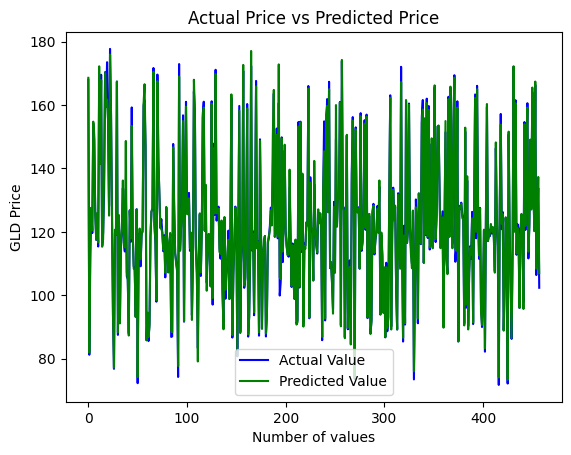

In [23]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()